In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head(2)

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### What are the ten most common movie names of all time?

In [6]:
t = titles
t.title.value_counts().head(10)

Hamlet                  19
Macbeth                 15
Carmen                  14
Othello                 11
Maya                    11
The Three Musketeers    11
The Outsider            11
Hero                    10
Anna                    10
Honeymoon               10
Name: title, dtype: int64

### Which three years of the 1930s saw the most films released?

In [7]:
t = titles
t = t[t.year // 10 == 193]
t.year.value_counts().head(3)

1937    1187
1936    1130
1938    1125
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

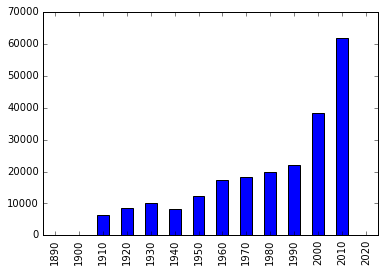

In [8]:
t = titles
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" films made each decade.

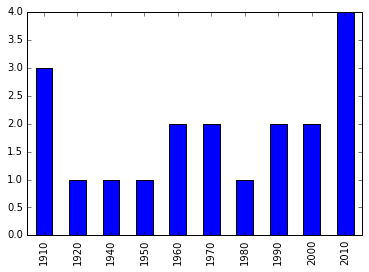

In [9]:
t = titles
t = t[t.title == 'Hamlet']
(t.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Rustler" characters in each decade of the history of film.

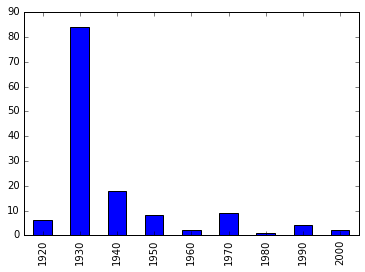

In [10]:
c = cast
c = c[c.character == 'Rustler']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### Plot the number of "Hamlet" characters each decade.

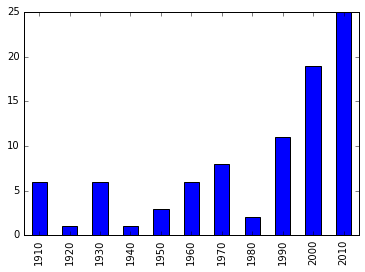

In [17]:
c = cast
c = c[c.character == 'Hamlet']
(c.year // 10 * 10).value_counts().sort_index().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [12]:
c = cast
c.character.value_counts().sort_values().tail(11)

Minor Role      6113
Bartender       6358
Nurse           6394
Party Guest     6459
Policeman       6687
Student         6719
Doctor          7185
Reporter        7877
Extra           9941
Dancer         11578
Himself        18981
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [13]:
c = cast
c = c[c.character == 'Herself']
c.name.value_counts().head(10)

Joyce Brothers        14
Queen Elizabeth II    11
Margaret Thatcher      7
Mary Jo Pehl           7
Joan Rivers            6
Marilyn Monroe         5
Bunny Yeager           5
Rekha                  5
Jane Fonda             5
Kareena Kapoor         5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [19]:
c = cast
c = c[c.character == 'Himself']
c.name.value_counts().head(10)

Adolf Hitler             96
Richard Nixon            43
Ronald Reagan            34
John F. Kennedy          27
Ron Jeremy               24
George W. Bush           22
Winston Churchill        21
Bill Clinton             20
Benito Mussolini         20
Franklin D. Roosevelt    20
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [20]:
c = cast
c = c[c.year == 1945]
c.name.value_counts().head(10)

Emmett Vogan        39
Sam (II) Harris     30
Harold Miller       29
Bess Flowers        28
Nolan Leary         27
Frank O'Connor      26
Franklyn Farnum     25
Larry Steers        25
Tom London          24
Charles Sullivan    24
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [23]:
c = cast
c = c[c.year == 2016]
c.name.value_counts().head()

Eric Roberts       53
Joelle Koissi      34
Leonel Claude      32
Dennis Nicomede    27
Maria Olsen        26
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

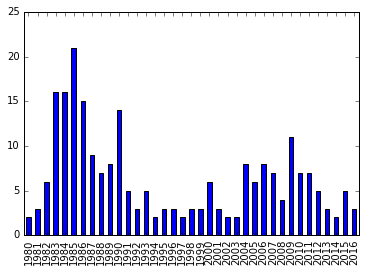

In [30]:
c = cast
c = c[c.name == 'Mammootty']
c = c[c.n.notnull()]
c = c.year.value_counts().sort_index().plot(kind='bar')


### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [40]:
c = cast
c = c[c.character.str.startswith('Patron in')]
c.character.value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in restaurant             3
Patron in Restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Quiet Bar              2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [41]:
c = cast
c = c[c.character.str.startswith('Science')]
c.character.value_counts().head(10)

Science Teacher         56
Science Student          9
Science Fair Student     9
Science Reporter         5
Science Promo Cadet      5
Science Fair Judge       5
Science Club Member      5
Science Kid              4
Science Fair Kid         3
Science Fair Teacher     3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

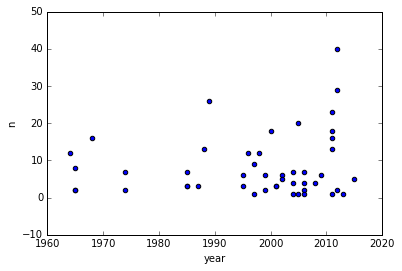

In [58]:
c = cast
c = c[c.name == 'Judi Dench']
c.plot(x='year', y='n',kind='scatter')

### Plot the n-values of Cary Grant's roles through his career.

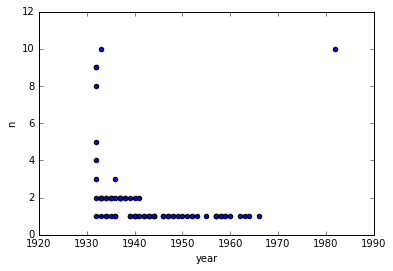

In [59]:
c = cast
c = c[c.name == 'Cary Grant']
c.plot(x='year', y='n',kind='scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

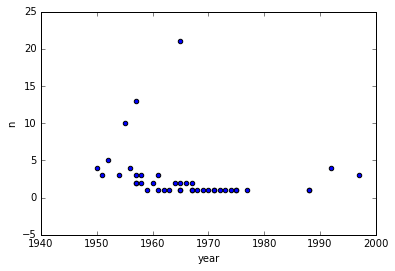

In [60]:
c = cast
c = c[c.name == 'Sidney Poitier']
c.plot(x='year', y='n',kind='scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [75]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 1]
c.type.value_counts()

actor      6494
actress    2881
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [74]:
c = cast
c = c[c.year // 10 == 195]
c = c[c.n == 2]
c.type.value_counts()

actress    4481
actor      4462
Name: type, dtype: int64